# Linear Regression And Feauture Engineering

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [85]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
from seaborn import scatterplot

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.impute import SimpleImputer

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


from sklearn.metrics import mean_absolute_error

### Read In And Check The Data 

In [5]:
# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv("datasets/dataset_concrete.csv")

# Shuffle the dataset
df = df.sample(frac=1, random_state=2)
df.reset_index(drop=True, inplace=True)

In [6]:
# The dimensions
df.shape

(1030, 9)

In [7]:
# The columns
df.columns

Index(['cement', 'slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age', 'strength'],
      dtype='object')

In [8]:
# The datatypes
df.dtypes

cement              float64
slag                float64
fly_ash             float64
water               float64
superplasticizer    float64
coarse_aggregate    float64
fine_aggregate      float64
age                   int64
strength            float64
dtype: object

In [10]:
# Maybe have a look at a few rows
df.head()


cement   slag  fly_ash  water  superplasticizer  coarse_aggregate  \
0   194.7    0.0    100.5  170.2               7.5             998.0   
1   153.6  144.2    112.3  220.1              10.1             923.2   
2   252.0    0.0      0.0  185.0               0.0            1111.0   
3   181.9  272.8      0.0  185.7               0.0            1012.4   
4   333.0    0.0      0.0  192.0               0.0             931.2   

   fine_aggregate  age  strength  
0           901.8   56     43.39  
1           657.9   28     16.50  
2           784.0   28     19.69  
3           714.3    7     12.37  
4           842.6   90     41.68

In [11]:
# Summary statistics
df.describe(include="all")

cement         slag      fly_ash        water  superplasticizer  \
count  1030.000000  1030.000000  1030.000000  1030.000000       1030.000000   
mean    281.167864    73.895825    54.188350   181.567282          6.204660   
std     104.506364    86.279342    63.997004    21.354219          5.973841   
min     102.000000     0.000000     0.000000   121.800000          0.000000   
25%     192.375000     0.000000     0.000000   164.900000          0.000000   
50%     272.900000    22.000000     0.000000   185.000000          6.400000   
75%     350.000000   142.950000   118.300000   192.000000         10.200000   
max     540.000000   359.400000   200.100000   247.000000         32.200000   

       coarse_aggregate  fine_aggregate          age     strength  
count       1030.000000     1030.000000  1030.000000  1030.000000  
mean         972.918932      773.580485    45.662136    35.817961  
std           77.753954       80.175980    63.169912    16.705742  
min          801.000000      594.000000     1.000000     2.330000  
25%          932.000000      730.950000     7.000000    23.710000  
50%          968.000000      779.500000    28.000000    34.445000  
75%         1029.400000      824.000000    56.000000    46.135000  
max         1145.000000      992.600000   365.000000    82.600000

In [12]:
features = ['cement', 'slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age']

### Create A Test Set

In [13]:
# Split off the test set: 20% of the dataset.
dev_df, test_df = train_test_split(df, train_size=0.8, random_state=2)

### Dataset Exploration 

In [14]:
# It can be good to do this on a copy of the dataset (excluding the test set, of course)
copy_df = dev_df.copy()

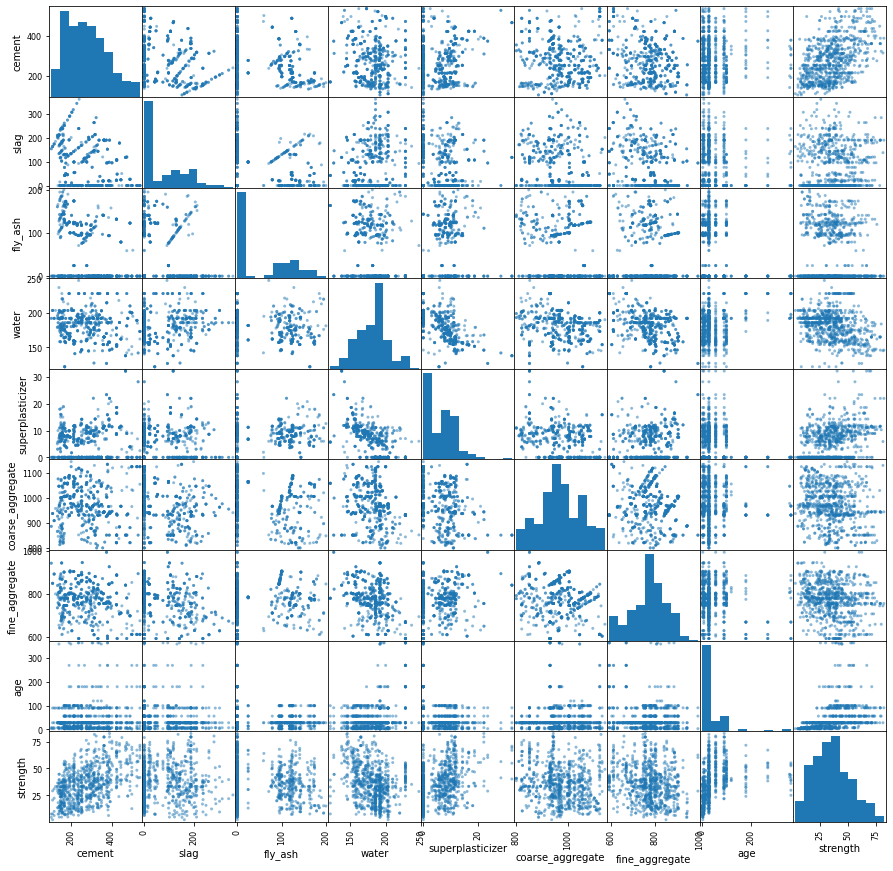

In [15]:
m = scatter_matrix(copy_df, figsize=(15, 15))plot = scatterplot(x="cement", y="strength", data=copy_df)

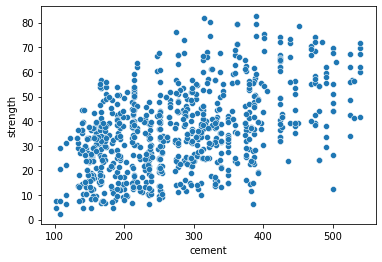

In [16]:
plot = scatterplot(x="cement", y="strength", data=copy_df)

In [17]:
copy_df.corr()

cement      slag   fly_ash     water  superplasticizer  \
cement            1.000000 -0.265872 -0.368845 -0.074208          0.094885   
slag             -0.265872  1.000000 -0.336454  0.118319          0.041492   
fly_ash          -0.368845 -0.336454  1.000000 -0.265362          0.390028   
water            -0.074208  0.118319 -0.265362  1.000000         -0.646000   
superplasticizer  0.094885  0.041492  0.390028 -0.646000          1.000000   
coarse_aggregate -0.085483 -0.293590 -0.052963 -0.203483         -0.266334   
fine_aggregate   -0.241458 -0.301793  0.096389 -0.431066          0.200186   
age               0.054228 -0.022790 -0.135268  0.258260         -0.177521   
strength          0.491461  0.143321 -0.075848 -0.286585          0.372800   

                  coarse_aggregate  fine_aggregate       age  strength  
cement                   -0.085483       -0.241458  0.054228  0.491461  
slag                     -0.293590       -0.301793 -0.022790  0.143321  
fly_ash                  -0.052963        0.096389 -0.135268 -0.075848  
water                    -0.203483       -0.431066  0.258260 -0.286585  
superplasticizer         -0.266334        0.200186 -0.177521  0.372800  
coarse_aggregate          1.000000       -0.165146  0.007115 -0.160208  
fine_aggregate           -0.165146        1.000000 -0.146157 -0.187260  
age                       0.007115       -0.146157  1.000000  0.334132  
strength                 -0.160208       -0.187260  0.334132  1.000000

In [18]:
# This is the water/cement ratio, so I'll call it wcr
copy_df["wcr"] = copy_df["water"] / copy_df["cement"]

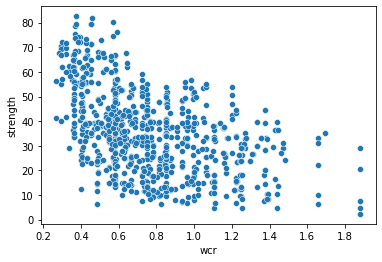

In [19]:
plot = scatterplot(x="wcr", y="strength", data=copy_df)

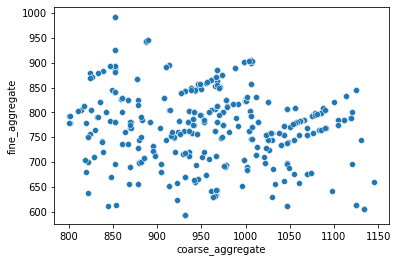

In [20]:
plot = scatterplot(x="coarse_aggregate", y="fine_aggregate", data=copy_df)

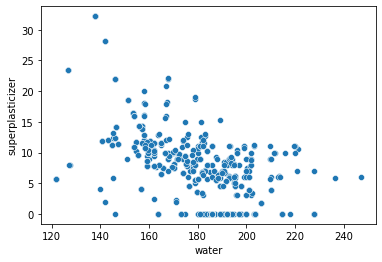

In [24]:
plot = scatterplot(x="water", y="superplasticizer", data=copy_df)

In [25]:
copy_df.corr()

cement      slag   fly_ash     water  superplasticizer  \
cement            1.000000 -0.265872 -0.368845 -0.074208          0.094885   
slag             -0.265872  1.000000 -0.336454  0.118319          0.041492   
fly_ash          -0.368845 -0.336454  1.000000 -0.265362          0.390028   
water            -0.074208  0.118319 -0.265362  1.000000         -0.646000   
superplasticizer  0.094885  0.041492  0.390028 -0.646000          1.000000   
coarse_aggregate -0.085483 -0.293590 -0.052963 -0.203483         -0.266334   
fine_aggregate   -0.241458 -0.301793  0.096389 -0.431066          0.200186   
age               0.054228 -0.022790 -0.135268  0.258260         -0.177521   
strength          0.491461  0.143321 -0.075848 -0.286585          0.372800   
wcr              -0.881791  0.350452  0.225326  0.334686         -0.221184   

                  coarse_aggregate  fine_aggregate       age  strength  \
cement                   -0.085483       -0.241458  0.054228  0.491461   
slag                     -0.293590       -0.301793 -0.022790  0.143321   
fly_ash                  -0.052963        0.096389 -0.135268 -0.075848   
water                    -0.203483       -0.431066  0.258260 -0.286585   
superplasticizer         -0.266334        0.200186 -0.177521  0.372800   
coarse_aggregate          1.000000       -0.165146  0.007115 -0.160208   
fine_aggregate           -0.165146        1.000000 -0.146157 -0.187260   
age                       0.007115       -0.146157  1.000000  0.334132   
strength                 -0.160208       -0.187260  0.334132  1.000000   
wcr                      -0.048050        0.077584 -0.007641 -0.496855   

                       wcr  
cement           -0.881791  
slag              0.350452  
fly_ash           0.225326  
water             0.334686  
superplasticizer -0.221184  
coarse_aggregate -0.048050  
fine_aggregate    0.077584  
age              -0.007641  
strength         -0.496855  
wcr               1.000000

### Model Selection

In [78]:
class InsertWCR(BaseEstimator, TransformerMixin):

    def __init__(self, insert=True):
        self.insert = insert
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.insert:
            X["wcr"] = X["water"] / X["cement"]
            X['cfr'] = X['coarse_aggregate'] / X['fine_aggregate']
            #X['ccr'] = X['coarse_aggregate'] + X['fine_aggregate'] / ['cement']  
            # If the new feature is intended to replace the existing ones, 
            # you could drop the existing ones here
            # X.drop(["cement", "water"], axis=1)
    
            X = X.replace( [ np.inf, -np.inf ], np.nan )
        return X

In [79]:
preprocessor = ColumnTransformer([
        ("features", Pipeline([("wcr", InsertWCR()),
                               ("imputer", SimpleImputer(missing_values=np.nan, strategy="mean"))]), 
                     features)],
        remainder="passthrough")

In [80]:
# Extract the features but leave as a DataFrame
dev_X = dev_df[features]
test_X = test_df[features]

# Target values, converted to a 1D numpy array
dev_y = dev_df["strength"].values
test_y = test_df["strength"].values

In [89]:
# # Create a pipeline that combines the preprocessor with linear regression
# ols = Pipeline([
#     ("preprocessor", preprocessor),
#     ("predictor", LinearRegression())])

# # Create a dictionary of hyperparameters
# ols_param_grid = {"preprocessor__features__wcr__insert": [True, False]}

# # Create the grid search object which will find the best hyperparameter values based on validation error
# ols_gs = GridSearchCV(ols, ols_param_grid, scoring="neg_mean_absolute_error", cv=10)

# # Run grid search by calling fit
# ols_gs.fit(dev_X, dev_y)

# # Let's see how well we did
# ols_gs.best_params_, ols_gs.best_score_

# KNN

In [93]:
# Create a pipeline that combines the preprocessor with linear regression
knn = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", KNeighborsRegressor())])

# Create a dictionary of hyperparameters
knn_param_grid = {"preprocessor__features__wcr__insert": [True, False]}

# Create the grid search object which will find the best hyperparameter values based on validation error
knn_gs = GridSearchCV(knn, knn_param_grid, scoring="neg_mean_absolute_error", cv=10)

# Run grid search by calling fit
knn_gs.fit(dev_X, dev_y)

# Let's see how well we did
knn_gs.best_params_, knn_gs.best_score_

({'preprocessor__features__wcr__insert': True}, -7.161729650308551)

# Evaluate On Test Set

In [94]:
# Now we re-train on train+validation and test on the test set

knn.set_params(**knn_gs.best_params_) 
knn.fit(dev_X, dev_y)
mean_absolute_error(test_y, knn.predict(test_X))

6.056126213592233

In [ ]:

# Different features used and worked
watrer/age
solids/aggs
age/ ash/water/cement
(total agg * water) / age
log age